<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/Galactic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit

In [2]:
# Constants
Mtotal = 1E11
Ttotal = 12E9
Sft = 1E9
TauSun = 10E9

# Constant star formation rate
SFR = Mtotal/Sft

# Time elapsed array
T = np.linspace(0, Ttotal, 12000)
Tl = len(T)

# Mass range array
M = np.linspace(0.5, 10, 100)
dM = M[1] - M[0]
Ml = len(M)

# Time of formation array
Tform = np.arange(0, Sft, 1E7)
dT = Tform[1] - Tform[0]
Tfl = len(Tform)


326088255.5343859
<function Nstar at 0x7fddf9466950>


'\nN=[]\nj=0\nfor i in range(0,len(Stnumb)):\n    j+=Stnumb[i]  * M[i]\n    N.append(j)\n     \nprint(N)\n\nplt.plot(Tform, N)\n'

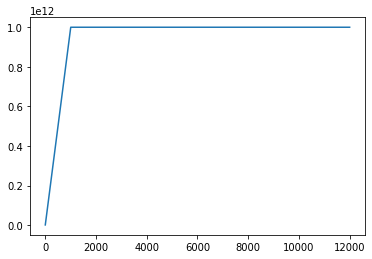

In [6]:
# Finding how the number of stars evolves over time

# Finding E0 = Mtotal/Mtot
def Mtot(M):
  return (M**(-1.35))

Int = Mtot(M)*dM
E0 = (SFR * dT)/np.sum(Int)
print(E0)

# Finding Number of stars per Mass interval
Stnumb = np.zeros(Ml)

def Nstar(M):
    return (M**(-2.35)) * E0 * dM

for i in np.arange(0, Ml, 1):
  Stnumb[i] = Nstar(M[i])

# Number of stars per mass range, for any given time
# i = Time
# j = Mass

NumMas = Ml
NumT = Tl

Numb = np.zeros((NumT, NumMas))
MassT = np.zeros(Tl)

for i in range(Tl):

  if (T[i] >= 1E9):
    Stnumb = 0
  else:
    Stnumb = 1
  for j in range(Ml):
    Numb[i][j] = Numb[i-1][j] + Nstar(M[j]) * Stnumb 
  MassT[i] = np.sum(Numb[i] * M)

plt.plot(MassT)

print(Nstar)

# 

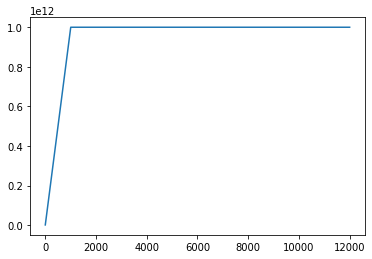

In [16]:
# Finding the Luminosity evolution of the stars

def Lumin(M, a):
  return (M**a)

Lumb = np.zeros((NumT, NumMas))
LumT = np.zeros(Tl)

for i in range(Tl):
  for j in range(Ml):
    if (M[j] >= 1):
      a = 3.9
    else:
      a = 5
    Lumb[i][j] = Numb[i][j] + Lumin(M[j],a)
  LumT[i] = np.sum(Lumb[i] * M)

plt.plot(LumT)

In [ ]:
# V magnitude and colour graphs

# Creating arrays for the V magnitude/BV colour data
MagMass = np.array([0.8, 1, 1.25, 2, 3, 5, 9, 15, 25])
Vmag = np.array([6.5, 4.93, 4.2, 1, -0.5, -1.4, -3.7, -4.3, -5.2])
BVmag = np.array([1.02, 0.69, 0.59, 0.1, -0.12, -0.18, -0.3, -0.32, -0.32])


# 